In [77]:
import numpy as np
import math
import matplotlib.pyplot as plt

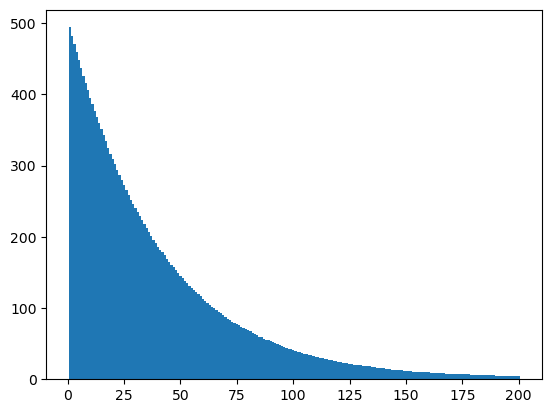

In [79]:
#Absorber case, Multiple particles

#Parameters
x_beg = 0
x_end = 0
L = 10
sigma_a = 0.5
sigma_t = 0.5  # Total macroscopic cross-section (cm^-1)
mu = 1
N_bins = 200

#Determine the length of each bin and set up counters for each bin to tally the particles
bin_length = L/ N_bins
bins_tally = np.linspace(0,0,200)

#Set up number of particles and their associated random number to determine distances
num_samples = 10000  # Number of distances to sample
ran_samples = np.random.rand(num_samples)

for i in range (num_samples):
    #Sapling distances
    d = -1 / sigma_t * np.log(ran_samples[i])

    #Add distance before any interaction occurs to inital position, accounting for angle
    x_end = x_beg + (mu * d)

    #Check if particle left the slab
    if x_end >= L:
        x_end = L
    elif x_end < 0:
        x_end = 0

    #Determine the bin that the particle has its first interaction in, and total track length in final bin.
    bin_num = x_end / bin_length
    bin_before = math.floor(bin_num)
    bin_current_length = (bin_num - bin_before) * bin_length

    #Add tallies to respective bins based on path length traveled in each bin
    for i in range(bin_before):
        bins_tally[i] = bins_tally[i] + bin_length
    
    #Add partial tally to bin where particle has its first interaction
    if x_end != L: 
        bins_tally[bin_before] = bins_tally[bin_before] + bin_current_length
    
    #Count Leakages
    left_leakage_tally = 0
    right_leakage_tally = 0
    if x_end ==0:
        left_leakage_tally = left_leakage_tally + 1
    if x_end ==L:
        right_leakage_tally = right_leakage_tally +1
    
    #Check absorbtion at the end of particle path length (should be 100% absorbtion rate, as it is the only interaction type)
    if x_end > 0 and x_end < L:
        rand = np.random.rand(1)
        if rand <= (sigma_a/sigma_t):
            continue

#Create figure showing scalar flux distributions across the bins
x = np.linspace(1,200, 200)
plt.bar(x, bins_tally, width=1.0)
plt.show()